<a href="https://colab.research.google.com/github/salmakhale/DL-computer-vision/blob/main/diabetes_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import r2_score

In [ ]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
X = diabetes.data
Y = diabetes.target

In [ ]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [ ]:
Y=Y/300
Y

array([0.50333333, 0.25      , 0.47      , 0.68666667, 0.45      ,
       0.32333333, 0.46      , 0.21      , 0.36666667, 1.03333333,
       0.33666667, 0.23      , 0.59666667, 0.61666667, 0.39333333,
       0.57      , 0.55333333, 0.48      , 0.32333333, 0.56      ,
       0.22666667, 0.16333333, 0.22666667, 0.81666667, 0.61333333,
       0.67333333, 0.45666667, 0.28333333, 0.43666667, 0.94333333,
       0.43      , 0.19666667, 1.13666667, 0.29      , 0.21666667,
       0.34      , 0.88333333, 0.92      , 0.84      , 0.3       ,
       0.33333333, 0.18333333, 0.20333333, 0.30666667, 0.86333333,
       0.17666667, 0.63333333, 0.47333333, 0.25      , 0.47333333,
       0.51666667, 0.75      , 0.19666667, 0.34666667, 0.60666667,
       0.42666667, 0.17333333, 0.12333333, 0.56666667, 0.56666667,
       0.20333333, 0.48      , 0.17333333, 0.42666667, 0.23666667,
       0.54333333, 0.5       , 0.32333333, 0.53333333, 0.59333333,
       0.16      , 0.9       , 0.67333333, 0.37      , 0.28333

In [ ]:

X.shape

(442, 10)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
x_test.shape

(89, 10)

In [ ]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(10,)))
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'mse',optimizer='adam',metrics=['mse'])

In [ ]:
trained = model.fit(x_train, y_train,
epochs=500,batch_size=32,validation_data = (x_test,y_test),
verbose=1)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3439 - mse: 0.3439 - val_loss: 0.2933 - val_mse: 0.2933
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3315 - mse: 0.3315 - val_loss: 0.2607 - val_mse: 0.2607
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2872 - mse: 0.2872 - val_loss: 0.2185 - val_mse: 0.2185
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2335 - mse: 0.2335 - val_loss: 0.1803 - val_mse: 0.1803
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1963 - mse: 0.1963 - val_loss: 0.1437 - val_mse: 0.1437
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1568 - mse: 0.1568 - val_loss: 0.1118 - val_mse: 0.1118
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1414 - mse: 0.1414 - val_loss: 0.0871 - val_mse: 0.0871
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1089 - mse: 0.1089 - val_loss: 0.0684 - val_mse: 0.0684
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.08

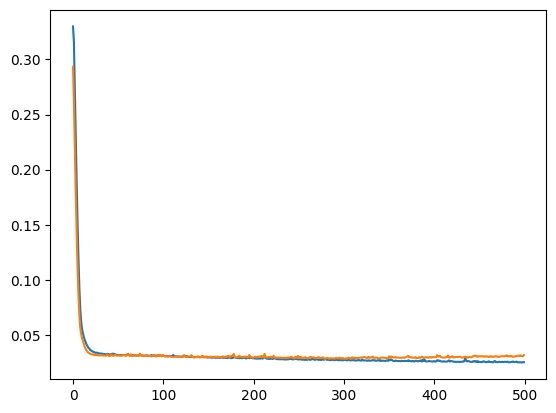

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.plot(trained.history['mse'])
plt.plot(trained.history['val_mse'])

In [ ]:
score = model.evaluate(x_test, y_test)
score

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - mse: 0.0344 


[0.03184851258993149, 0.03184851258993149]

In [ ]:

prediction = model.predict(x_test)
print(prediction.flatten())
print(y_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[0.43059316 0.6000546  0.48546073 0.96913266 0.3707135  0.3128193
 0.84344876 0.63018894 0.22279945 0.34298116 0.30215687 0.46020183
 0.33964652 0.7005768  0.2663009  0.32217008 0.8305665  0.8972225
 0.669045   0.7535472  0.4904242  0.2816945  0.18186647 0.67732036
 0.50380415 0.4742765  0.65214336 0.56758994 0.18056124 0.33781165
 0.45749584 0.4192041  0.33707178 0.65581405 0.5403014  0.64317656
 0.38679734 0.37324223 0.52835906 0.18836874 0.21042715 0.26373136
 0.6013644  0.5890174  0.58204645 0.19825442 0.31369528 0.32243964
 0.20963386 0.5705204  0.37869692 0.3542715  0.35161537 0.3439529
 0.47733483 0.5375015  0.30441445 0.8171798  0.3534362  0.16177037
 0.5954619  0.5994906  0.36697397 0.21273026 0.44353196 0.7078047
 0.4772933  0.61273015 0.4522911  0.36934656 0.2842051  0.6668098
 0.78581345 0.3740017  0.2829051  0.5227207  0.614763   0.65652514
 0.5083624  0.6900239  0.44280913 0.5323929  0.15728131 0.1915296
 0.3541865  0.2010616  0.23655

In [ ]:
r2_score(y_test,prediction)

0.4589875682124913